## **Simulate Helmholtz coils with Square shape in a single Axis**

Change root directory

In [2]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import Libraries

In [3]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot

Simulation Settings

In [4]:
# Initialize coil parameters
number_of_spires = 2
size_length =  1.05 
distance_among_spires = 0.59
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
grid_length_size = 0.01 #Space among evaluation points
num_seg = 100           #Numer of segments 

Set the spires Geometry

In [5]:
##Spawn spires
spire_x_s = X_coil.square_spires(num_seg)
print(spire_x_s.shape)
##PLot spires
f0 = None
f0 = hplot.plot_spires(f0, spire_x_s, color='black', row=None, col=None)

f0.show()

(2, 3, 400)


Set Simulation Grid

In [6]:
# Generar grid
X, Y, Z = sim.generate_range([-0.8, 0.8],[-0.8, 0.8], [-0.8, 0.8], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

## Run Simulations

In [ ]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, spire_x_s, batch_Size, enable_progress_bar=True, n=parallel_coils)

end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

# Save results in a CSV file
output_file = 'data/x_coil_results_square.csv'
x_coil_results_s.to_csv(output_file, index=False)

Simulation Progress:  36%|███▋      | 241/661 [02:34<04:17,  1.63it/s]Process ForkPoolWorker-4823:
Process ForkPoolWorker-4821:
Process ForkPoolWorker-4831:
Process ForkPoolWorker-4840:
Process ForkPoolWorker-4834:
Process ForkPoolWorker-4829:
Traceback (most recent call last):
Process ForkPoolWorker-4833:
Traceback (most recent call last):
Process ForkPoolWorker-4836:
Process ForkPoolWorker-4827:
Process ForkPoolWorker-4830:
Process ForkPoolWorker-4839:
Process ForkPoolWorker-4826:
Process ForkPoolWorker-4835:
Process ForkPoolWorker-4828:
Process ForkPoolWorker-4832:
Process ForkPoolWorker-4822:
Process ForkPoolWorker-4838:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-4825:
Process ForkPoolWorker-4837:
Traceback (m

## Plot the obtained results

In [7]:
# Read data from previous simulations
x_coil_results_s = pd.read_csv('data/x_coil_results_square.csv')

reference_value:  4.543281440738449e-05


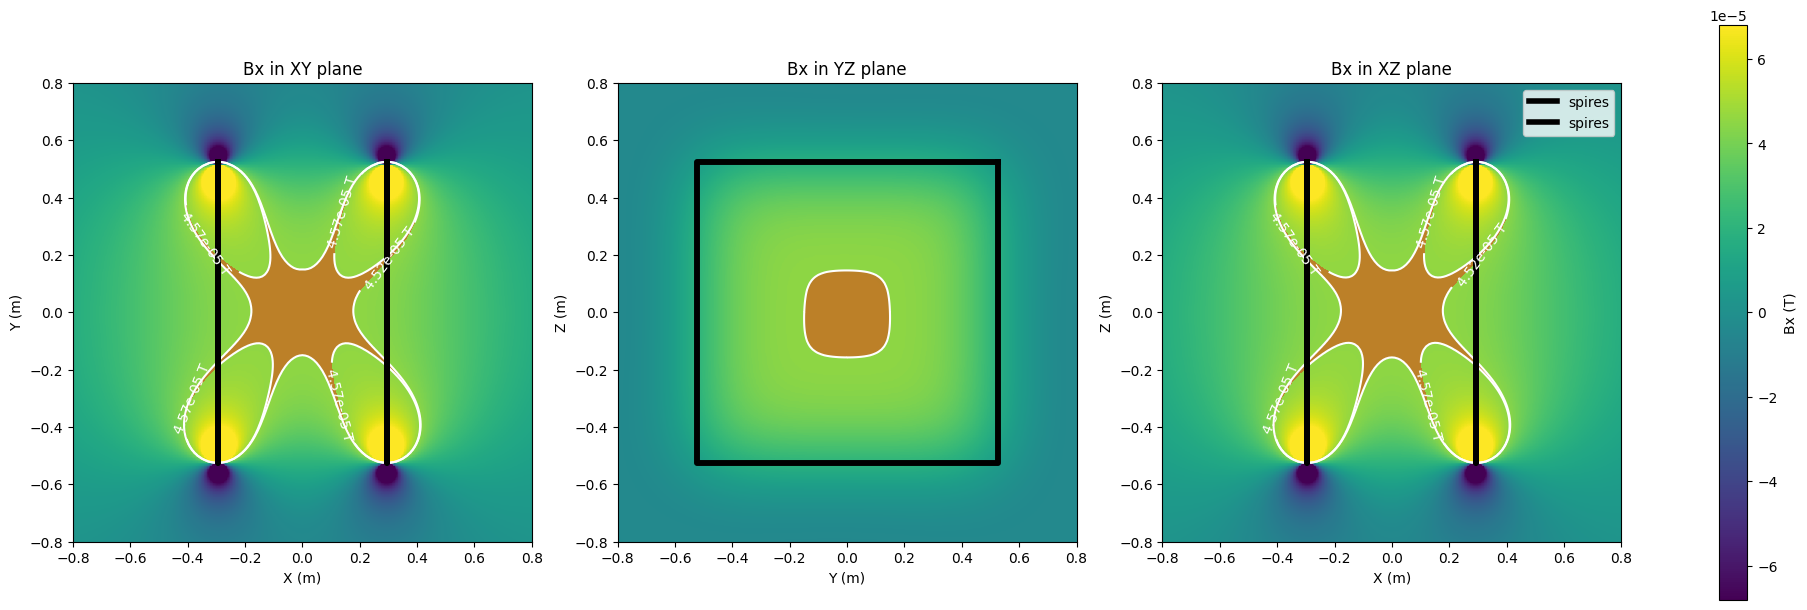

In [10]:
# Print the Bx component
hplot.plot_2d_magnetic_field(x_coil_results_s, spire_x_s, index='Bx', use_fixed_zaxis=True)

In [ ]:
hplot.simple_3d_surface_plot(x_coil_results_s, spire_x_s, 'Bx', True)

In [ ]:
hplot.plot_mainAxis_field(x_coil_results_s, index='Bx')

In [ ]:
hplot.plot_magnetic_field_directions(x_coil_results_s, spire_x_s)